**Import dependencies**

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load data and define classes**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Play around with data

In [5]:
print(X_train.shape)
print(X_train[5])

(50000, 32, 32, 3)
[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


In [ ]:
y_train[:2]

array([[6],
       [9]], dtype=uint8)

**Reshape/rescale data**

In [ ]:
y_train = y_train.reshape(-1,)

Custom plot function

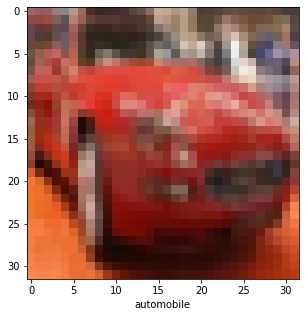

In [ ]:
def plot(X, y, index):
    plt.figure(figsize = (5,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot(X_train, y_train, 5)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**Set up model**

In [ ]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=36, kernel_size=(4,4), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=72, kernel_size=(4,4), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # ann dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4976 - accuracy: 0.4601
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1681 - accuracy: 0.5854
Epoch 3/15
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0496 - accuracy: 0.6334
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9613 - accuracy: 0.6651
Epoch 5/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8919 - accuracy: 0.6911
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8337 - accuracy: 0.7106
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7892 - accuracy: 0.7248
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7472 - accuracy: 0.7390
Epoch 9/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7085 - accuracy: 0.7511
Epoch 10/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.667

**Model Testing**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.85      0.76      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.51      0.51      0.51      1000
           4       0.64      0.62      0.63      1000
           5       0.56      0.60      0.58      1000
           6       0.77      0.75      0.76      1000
           7       0.69      0.75      0.72      1000
           8       0.84      0.74      0.78      1000
           9       0.81      0.71      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(e) for e in y_pred]
y_classes[:5]


[3, 8, 8, 0, 4]

In [6]:
y_test = y_test.reshape(-1,)
y_test[:5]

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


array([3, 8, 8, 0, 6], dtype=uint8)

'deer'

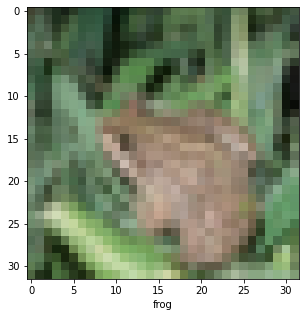

In [ ]:
plot(X_test, y_test, 4)
classes[y_classes[4]]